---
Zurück zur Übersicht | [Inhalt](00_Inhalt.ipynb)

---

In [1]:
# Für diese Notebook benötigte Pakete:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
from IPython.core.display import HTML 

# Dynamische Messsysteme

## Inhalt
***

### [Linear zeitinvariante (LZI) Systeme](#Sec-LZI_system)
### [System-Identifizierung](#Sec-System-Identifizierung)
* [White Box](#SubSec-SubSec-white_box)
    * [Aufstellen der Differentialgleichung](#SubSubSec-Aufstellen_der_Differentialgleichung)
    * [Lösen der Differentialgleichung](#SubSubSec-Lösen_der_Differentialgleichung)

* [Black box](#SubSec-SubSec-black_box)
    * [Interpretation der Sprungantwort](#SubSubSec-Interpretation_der_Sprungantwort)
    * [Impulsantwort und Faltung](#SubSubSec-Impulsantwort_und_Faltung)

***

## Linear zeitinvariante (LZI) Systeme 
<a id="Sec-LZI_system"></a>

LTI Systeme sind wichtig, da sie zwar sehr vereinfacht sind, aber gut zu lösen sind. Sie sind in der Tat die einzigen Systeme, die wir lösen können (mittels Differentialgleichungen). 

Für ein LTI System können Ausgangssignale vorhergesagt werden, die man für ein bestimmtes Eingangssignale erwarten würde. Das gleiche gilt auch für *Veränderungen* von Eingangssignalen. 

Das liegt daran, dass LTIs bestimmte Eigenschaften haben: *Superposition, Homogenität und Zeitinvarianz*.
Im Folgenden sei $h$ ein Operator, der eine lineare Abbildung zwischen Eingangsvektor $x(t)$ und dem Ausgang eines Systems, Vektor $y(t)$, darstellt. 
Für ein **lineares System** gelten allgemein folgende Eigenschaften:
* **Homogenität**: Wenn $x(t)$ mit Faktor $a$ skaliert wird, dann wird $y(t)$ ebenso skaliert
    * Ein Sprung der Größe $A$ produziert eine Schwingung mit Größe $B$
    * Da h(x) linear ist, wird ein verdoppelter Sprung am Eingang, also $2A$ zu einer Verdopplung am Ausgang, $2B$, führen
* **Superposition** bedeutet Additivität: Addiere zwei Eingangssignale, $A$ und $B$ zusammen, sprich $A+B$, dann ist die Antwort des linearen Systems auch die Summe der individuellen Ausgänge ($a$ und $b$), also $a+b$. 
* **Zeitinvariant**: Das Systeme verhält sich immer gleich, egal wann in der Zeit es durchgeführt wird.
    * Wird das Eingangssignal $$x(t) um $T$ verschoben, dann ist auch das Ausgangssignal um $T$ verschoben.

In Realität gibt es fast immer Abweichungen von diesen Idealvorstellungen. D.h. wir können mit LTIs Eingänge eines Signals skalieren, verschieben und summieren, aber sie entsprechen niemals einem realen System. Warum sind sie dann so wichtig? Richard Feynman sagte damals: „Linear Systems are important, because we can solve them“. 
Selbst wenn LTI nicht real ist, so können wir reale Probleme sehr gut *annähern* indem wir LTI Analysen durchführen.
Das heißt, stell immer sicher, dass dein System für einen bestimmten Bereich linear funktioniert. 

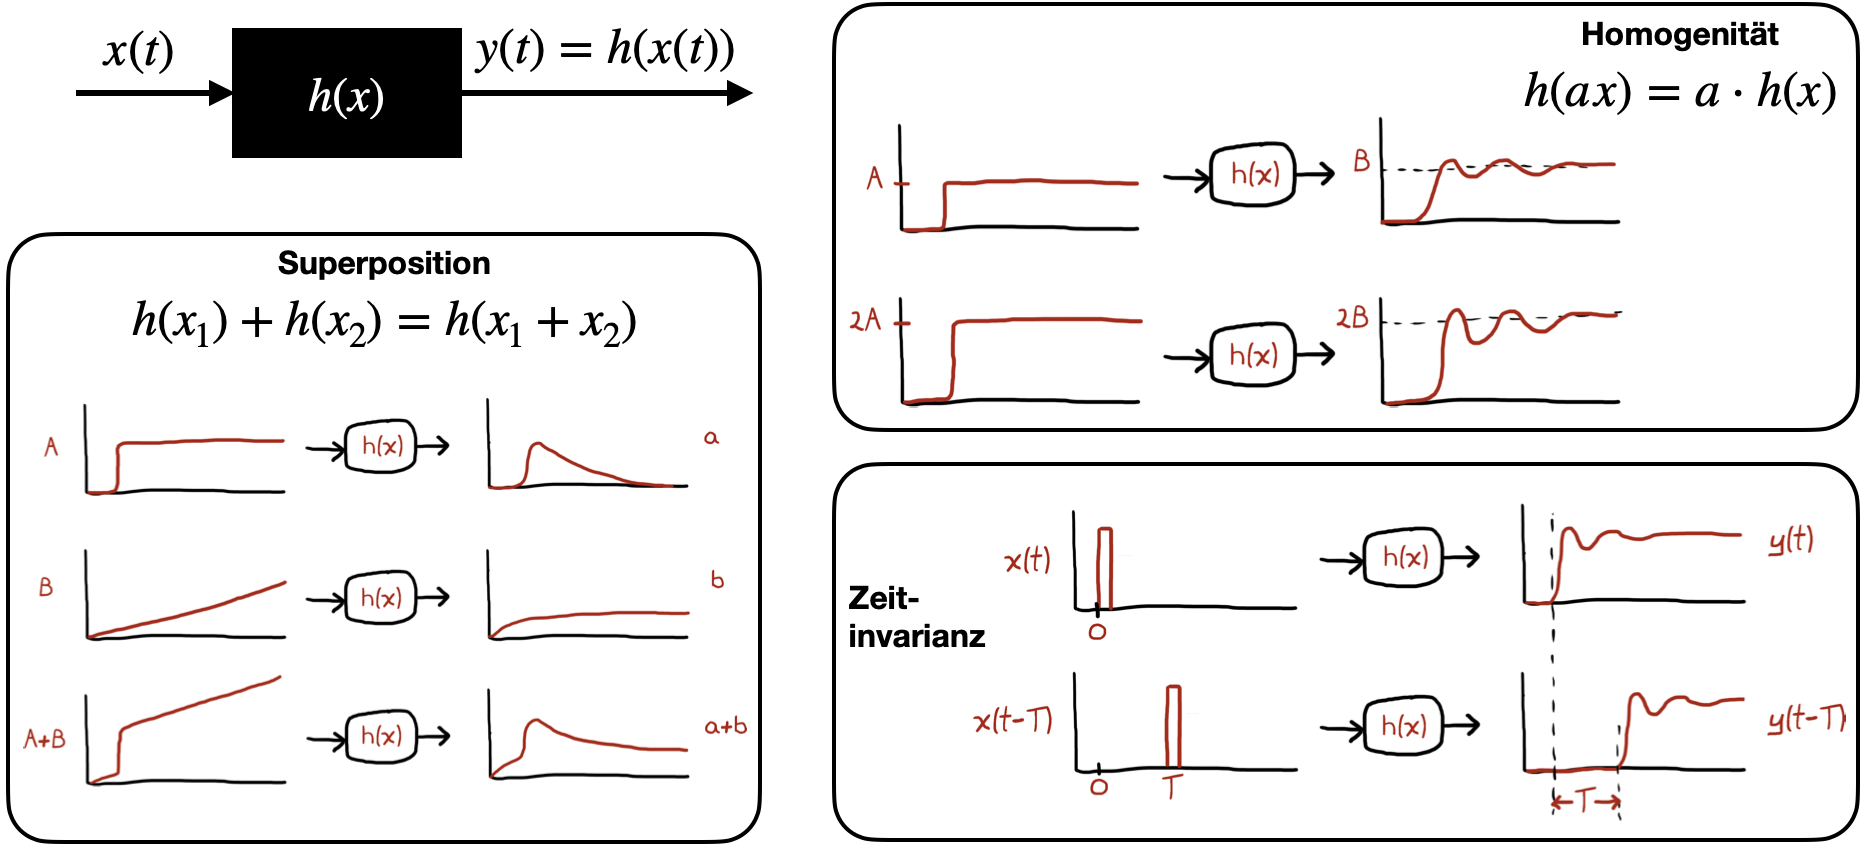

In [2]:
Image("pictures/LZI.png", width=750)

## System-Identifizierung
<a id="Sec-System-Identifizierung"></a>

Jedes Messsystem hat eine spezifische Übertragungsfunktion $h(t)$, welche, angewendet auf ein Eingangssignal $x(t)$, ein Ausgangssignal $y(t)$ liefert. Im Allgemeinen kann man drei Probleme in der Praxis erkennen, jenachdem welche Informationen einem vorliegen:

1. $x(t)$ und $h(t)$ sind gegeben -> $y(t)$ ist gesucht: Dies ist das **Simulationsproblem**
    * Anhand von Simulationen kann der Ausgang eines Systems vorhergesagt werden.
2. $h(t)$ und $y(t)$ sind gegeben -> $x(t)$ ist gesucht: Dies ist das **Kontrollproblem**
    * Dieses Problem wird man in der Regelungstechnik häufig antreffen, wo eine Regelgröße am Eingang des Mess- bzw. Regelsystems gesucht wird um einen stabilen Zustand zu erreichen.
3. $u(t)$ und $y(t)$ gegeben -> $h(t)$ ist gesucht: Dies ist das **System-Identifizierungsproblem**
    * Hier wollen wir das Messsystem charaktisieren, was unter anderem durch 2 Methoden möglich ist: Mittels Messungen der Eingangs- und Ausgangsgröße, oder mittels Aufstellen von Differentialgleichungen (Systemtheorie).
    
Während Problem 1 und 2 Bestandteil anderer Vorlesungen oder Themengebiete ist, wollen wir uns im Folgenden mit dem Problem 3 befassen. Hier wollen wir im Folgenden zwei Möglichkeiten betrachten, mittels welcher $h(t)$ bestimmt werden kann. Die beiden Methoden werden im folgenden mit **black box** und **white box** bezeichnet. 

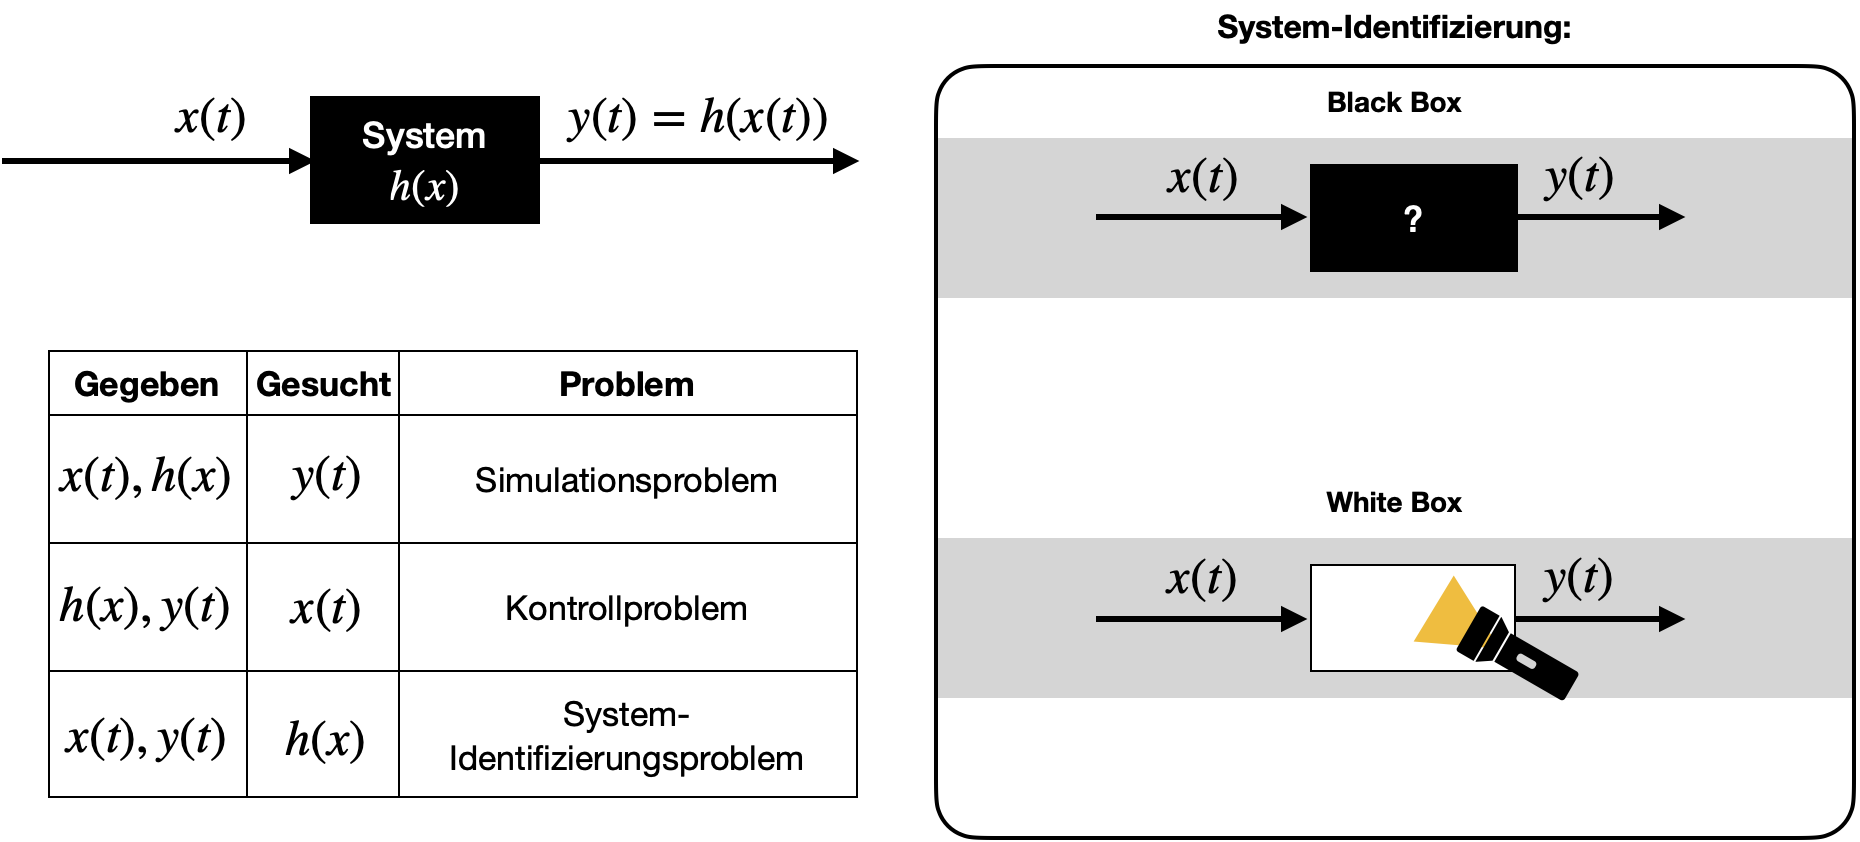

In [3]:
Image("pictures/3probleme.png", width=750)

### White Box
<a id="SubSec-white_box"></a>

Mit dem *white box*-Verfahren lösen wir das System-Identifizierungsproblem indem wir genau analysieren, aus welchen Komponenten unser System besteht. Anhand eines Tiefpasses 1. Ordnung wollen wir uns die Vorgehensweise einmal ansehen. 

#### Aufstellen der Differentialgleichung
<a id="SubSubSec-Aufstellen_der_Differentialgleichung"></a>
In diesem Falle gucken wir in unser System rein. Wir sehen die elektronische Schaltung bestehend aus einer Reihenschaltung von Widerstand mit Wert $R$ und Kondensator mit Kapazität $C$. Am Eingang liegt die Spannung $u_e(t)$ an. Über $C$ kann die Ausgangsspannung $u_a(t)$ gemessen werden. Der Strom, mit dem der Kodensator aufgeladen ist bekanntlich

$$i_C(t) = C\cdot \frac{du_a}{dt}$$

wobei $u_a(t)$ im allgemeinen die Spannung ist, die am Kondensator anfällt und in diesem Falle gleich der Ausgangsspannung ist. 

Außerdem gilt $i_R(t) = i_C(t)$. Damit können wir die Spannung, die über den Widerstand $R$ abfällt, wie folgt schreiben:

$$u_R(t) = R \cdot i_R(t) = R \cdot C\cdot \frac{du_a}{dt}$$

Aus der Maschenregel, hier $ u_a(t) + u_R(t) = u_e(t)$ folgt nach Einsetzen von $u_R(t)$ folgendes:

$$RC \frac{du_\mathrm a (t)}{dt} + u_\mathrm a (t) = u_\mathrm e (t)$$

Dies ist eine **Differentialgleichung (DGL) 1. Ordnung**. Die Differentialgleichung erkannt man daran, dass auch eine zeitliche Ableitung der Ausgangsgröße (also ein Differential) in der Formel auftritt. Da allerdings nur die 1. zeitliche Ableitung auftritt, handelt es sich um eine DGL 1. Ordnung. Würde Ausgangs oder Eingangsgröße zweimal zeitliche abgeleitet werden, würde es sich um eine DGL 2. Ordnung handeln usw. 

Systeme 1. Ordnung beschreiben *Energiespeicher*, also z.B. Temperaturmesser, die warm werden, oder auch Operationsverstärker, Kapazitäten und Elektromagneten. Im Prinzip ist jedes System, was sich erwärmt, ein Energiespeicher und wird somit ein System 1. Ordnung sein. Systeme 2. Ordnung haben einen zusätzlichen Dämpfungsterm. In diesen Systeme findet auch eine Umlagerung von Energien statt, wie es z.B. in einem LC-Schwingkreis passiert. Kondensator und Spule tauschen ständig Energien aus, wodurch es zu einer periodischen Schwingung kommt. Dieses System wir durch eine DGL 2. Ordnung beschrieben. 

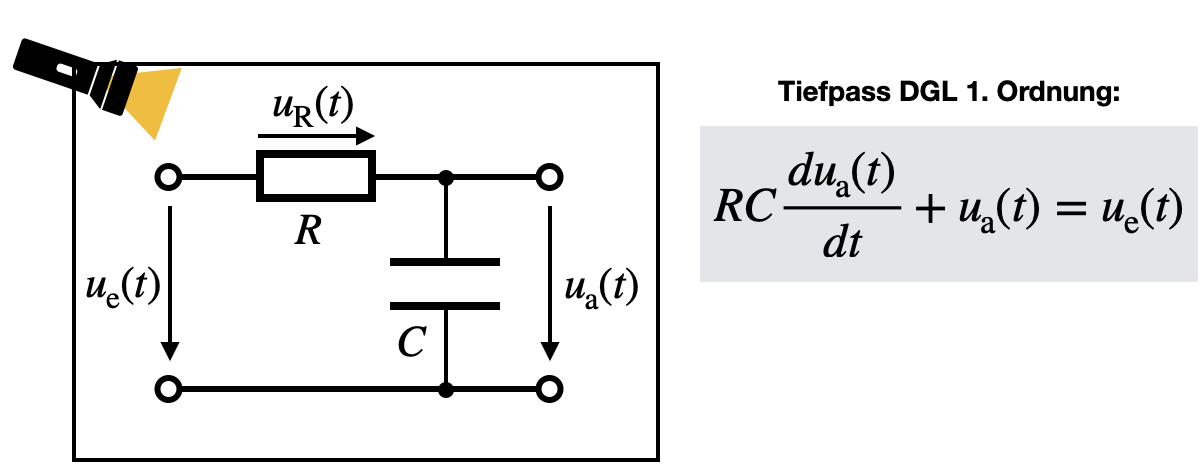

In [4]:
Image("pictures/white_box.png", width=750)

#### Lösen der Differentialgleichung
<a id="SubSubSec-Lösen_der_Differentialgleichung"></a>

Ziel ist es jetzt, eine Funktion für Eingangs- und Ausgangsspannung zu finden, die diese Gleichung erfüllt. Hierfür geht man im Allgemeinen in 5 Schritten vor. Wie werden später in diesem Kapitel noch sehen, dass DGL im Frequenz- bzw. Laplaceraum viel einfacher gelöst werden können als wir es hier, im Zeitraum, jetzt machen.

**1. Homogener Ansatz:**
Unter homogenen Ansatz verstehen wir das Eingangssignal auf Null zu setzen: $u_e(t) = 0$. Das heißt das System wird nicht belastet. Die DGL vereinfacht sich zu

$$RC \frac{du_\mathrm a (t)}{dt} + u_\mathrm a (t) = 0$$

und kann umgeformt werden zu

$$RC \frac{du_\mathrm a (t)}{dt} = -u_\mathrm a (t)$$

Das bedeutet, wird suchen eine Funktion für $u_a(t)$ die nach der Zeit abgeleitet wieder sie selber ist. Eine Exponentialfunktion erfüllt genau diese Bedingung und wir nutzen sie für unseren homogenen Ansatz:

$$u_{a,\mathrm{homogen}}(t) = K \cdot \mathrm e^{-\gamma t} \quad \Rightarrow \quad \dot u_{a,\mathrm{homogen}}(t) = -\gamma K \cdot \mathrm e^{-\gamma t}$$

mit den Konstanten $K$ und $\gamma$. Dies wird in die homogene DGL eingesetzt und es folgt:

$$-RCK\gamma \mathrm e^{-\gamma t} + K \mathrm e^{-\gamma t} = 0 \quad \Rightarrow \quad -RC\gamma + 1 = 0$$

Daraus folgt für die erste Konstante 

$$\gamma = \frac{1}{RC} := \frac{1}{\tau}$$

**2. Spezieller Ansatz für Anfangsbedingung:**
Jetzt legen wir statt Null einen *Sprung* an den Eingang $u_e(t)$ an: $u_e(t) = u_0$ für $t = 0$. Für lange Zeiten wird sich der Kondensator komplett aufgeladen haben, sodass der Ausgang ein konstantes Signal liefert. Das heißt unsere Lösung für ein spezielles Eingangssignal ist

$$u_{a,\mathrm{speziell}}(t) = u_0 \quad \mathrm{für} \quad t \rightarrow \infty$$

**3. Allgemeiner Ansatz:**
Nun kann der allgemeine Ansatz formuliert werden. Diese ist einfach die Addition von homogener und spezieller Ansatz:

$$u_a(t) = u_{a,\mathrm{homogen}}(t) + u_{a,\mathrm{speziell}}(t) = u_0 + K \cdot \mathrm e^{-t/\tau}$$

**4. Konstante bestimmen:**
Eine Konstante war schon bestimmt, nämlich $\gamma = \frac{1}{RC} := \frac{1}{\tau}$. Diese Zeitkonstante wurde bereits in den allgemeinen Ansatz unter 3. eingefügt. Um $K$ zu bestimmen, setzen wir unsere Anfangsbedingung von Schritt 2. ein: Zum Zeitpunkt $t=0$ ist das System zwar am Eingang mit $u_0$ belastet, der Ausgang ist jedoch noch Null, solange der Kondensator nicht vollständig aufgeladen ist. Wir setzen also $t=0$, $u_e(t=0) = u_0$ und $u_a(t = 0) = 0$ in den allgemein Ansatz ein:

$$u_a(0) = u_0 + K \cdot \mathrm e^{-0/\tau}$$
$$0 = u_0 + K \cdot 1 \quad \Rightarrow \quad K = -u_0$$

**5. Lösung hinschreiben:**
Für die Lösung setzen wir alle unsere bestimmten Konstanten in den allgemeinen Ansatz ein und erhalten:

$$u_a(t) = u_0 \left(1- \mathrm e^{-\frac{t}{RC}}\right)$$

Dies ist auch die sogenannte **Sprungantwort** eines Systems 1. Ordnung, da wir in Schritt 2. einen *Sprung* angelegt haben. Hätten wir uns als Eingangssignal einen Impuls (eine Delta-Funktion) ausgesucht, hätten wir die **Impulsantwort** des Systems bestimmt.

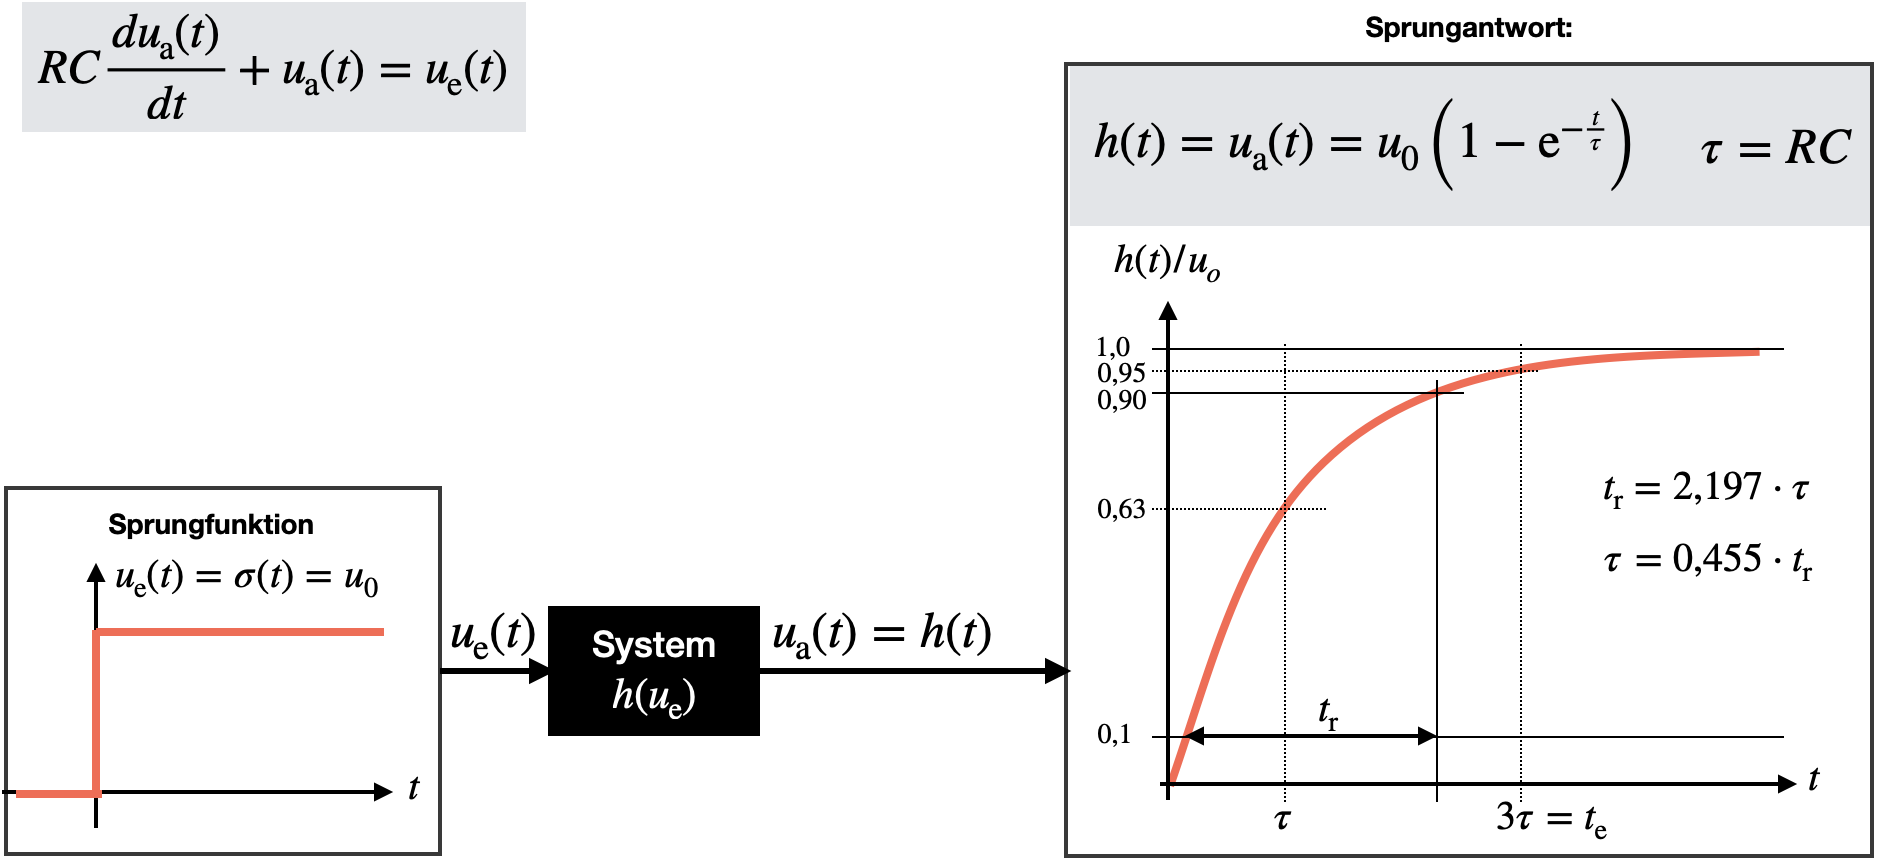

In [11]:
Image("pictures/sprungantwort.png", width=600)

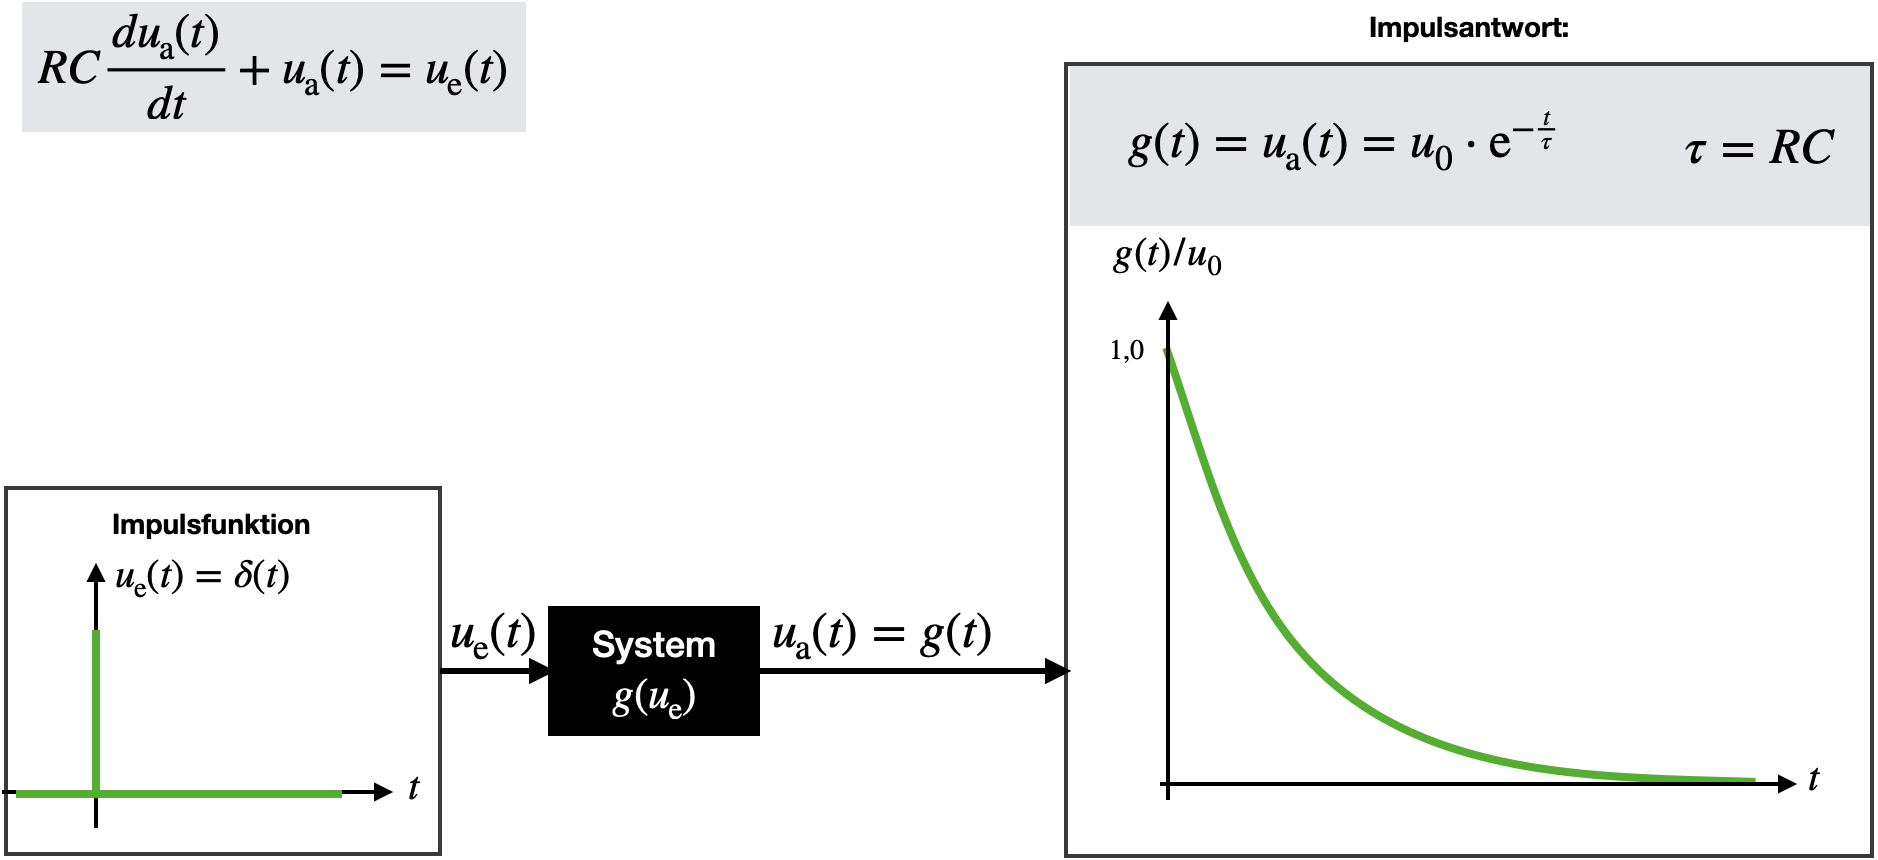

In [12]:
Image("pictures/impulsantwort.png", width=600)

### Black Box
<a id="SubSec-white_box"></a>

Bei dem Prinzip der black box kenne ich das Innenleben meines Messsystems nicht, und ich kann lediglich mittels Messungen darauf zurück schließen. Je nachdem, welches Signal an den Eingang angelegt wird, erhalte ich ein andere Ausgangssignal. Dies ist in den beiden Bildern aus dem vorausgegangenen Kapitel deutlich zu erkenne. In einem Fall wurde ein Sprung angelegt, im anderen Fall ein Impuls. 

In der Messtechnik ist es hingegen häufig viel aussagekräftiger das Übertragungsverhalten einer Messeinrichtung mittels Testfunktionen zu überprüfen. Sprung und Impuls gehören zu des Testfunktionen, doch auch eine Rampenfunktion (ein sich kontinuierlich erhöhendes Eingangssignal) oder ein Sweep (hier werden verschiedene Frequenzen direkt nacheinander durchgefahren) haben sich bewährt. 

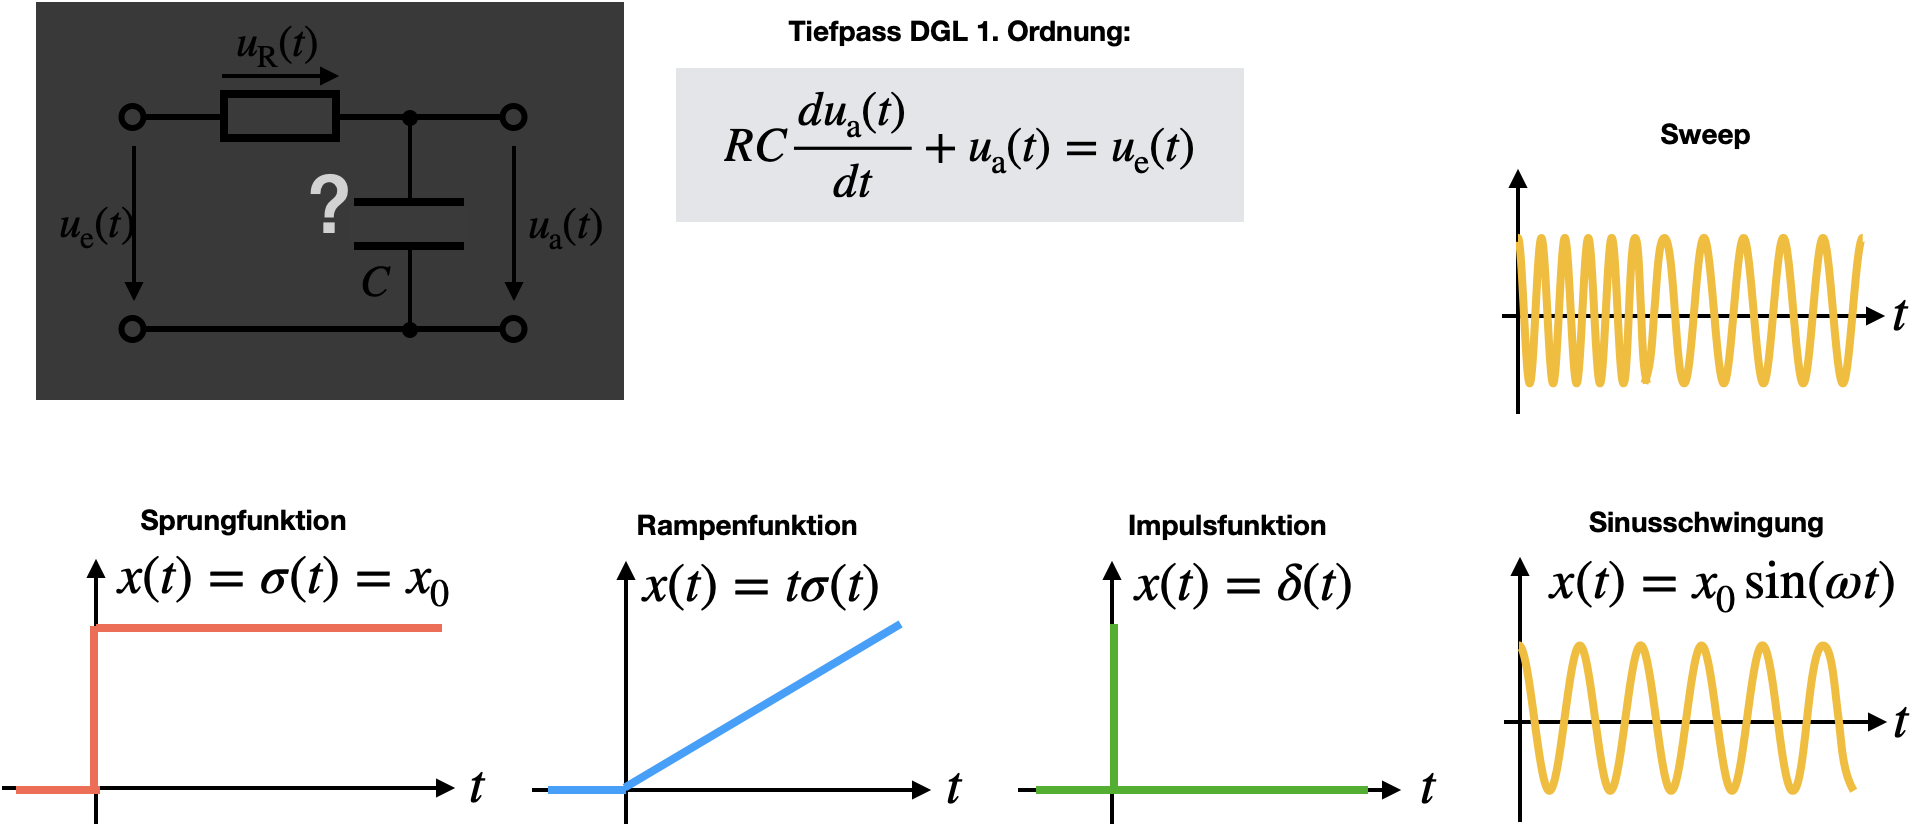

In [14]:
Image("pictures/testfunktionen.png", width=600)

Das Vorgehen ist wiefolgt: Es wird eine Testfunktion angelegt und gemessen. Der Ausgang des Systems wird abgegriffen und ebenfalls gemessen. Ein Vergleich aus angelegtem Eingangssignal und gemessener Systemantwort (Ausgangssignal) können Rückschlüsse für das System getroffen werden. 

#### Interpretation der Sprungantwort
<a id="SubSubSec-Interpretation_der_Sprungantwort"></a>

An dieser Stelle wollen wir uns ansehen, was man aus der Sprungantwort eines Tiefpasses 1. Ordnung im Labor ablesen kann. 
* Geplottet im nachfolgenden Bild ist die normalisierte Sprungantwort, d.h. das Ausgangssignal wurde durch $u_0$ dividiert. Nach langer Einpendelzeit folgt der Ausgang dem Eingangssignal.
* $\tau$ ist die Zeitkonstante, die die *Trägheit* eines Systems bestimmt. 
    * Aus der Theorie ist bekannt (siehe vorheriges Kapitel): $\tau = RC$ 
    * Nach der Zeit $\tau$ ist das Ausgangssignal auf 63% seines maximal möglichen Wertes angestiegen. Es ist noch kein stationärer Zustand erreicht.
* Einstellzeit $t_e$: Dies ist das *95%-Kriterium*:
    * Für ein System 1. Ordnung muss die Sprungantwort $h(t)$ nach der Zeit $t = 3\tau$ 95% des Endwertes erreicht haben.
    * Nur wenn dies der Fall ist, handelt es sich um ein System mit Ausgleich 1. Ordnung
    * Für ein System 2. Ordnung ist häufig ein Überschwingungen oder Einpendeln zubeoachten. Dann ist $t_e$ Zeit vom Anlegen der Sprungfunktion bis zum Erreichen des Toleranzbandes innerhalb von 0,95 und 1,05.
* *Anstiegszeit* $t_r$: Dies ist die Dauer für einen Signalanstieg von 10% auf 90% am Ausgang des Systems.

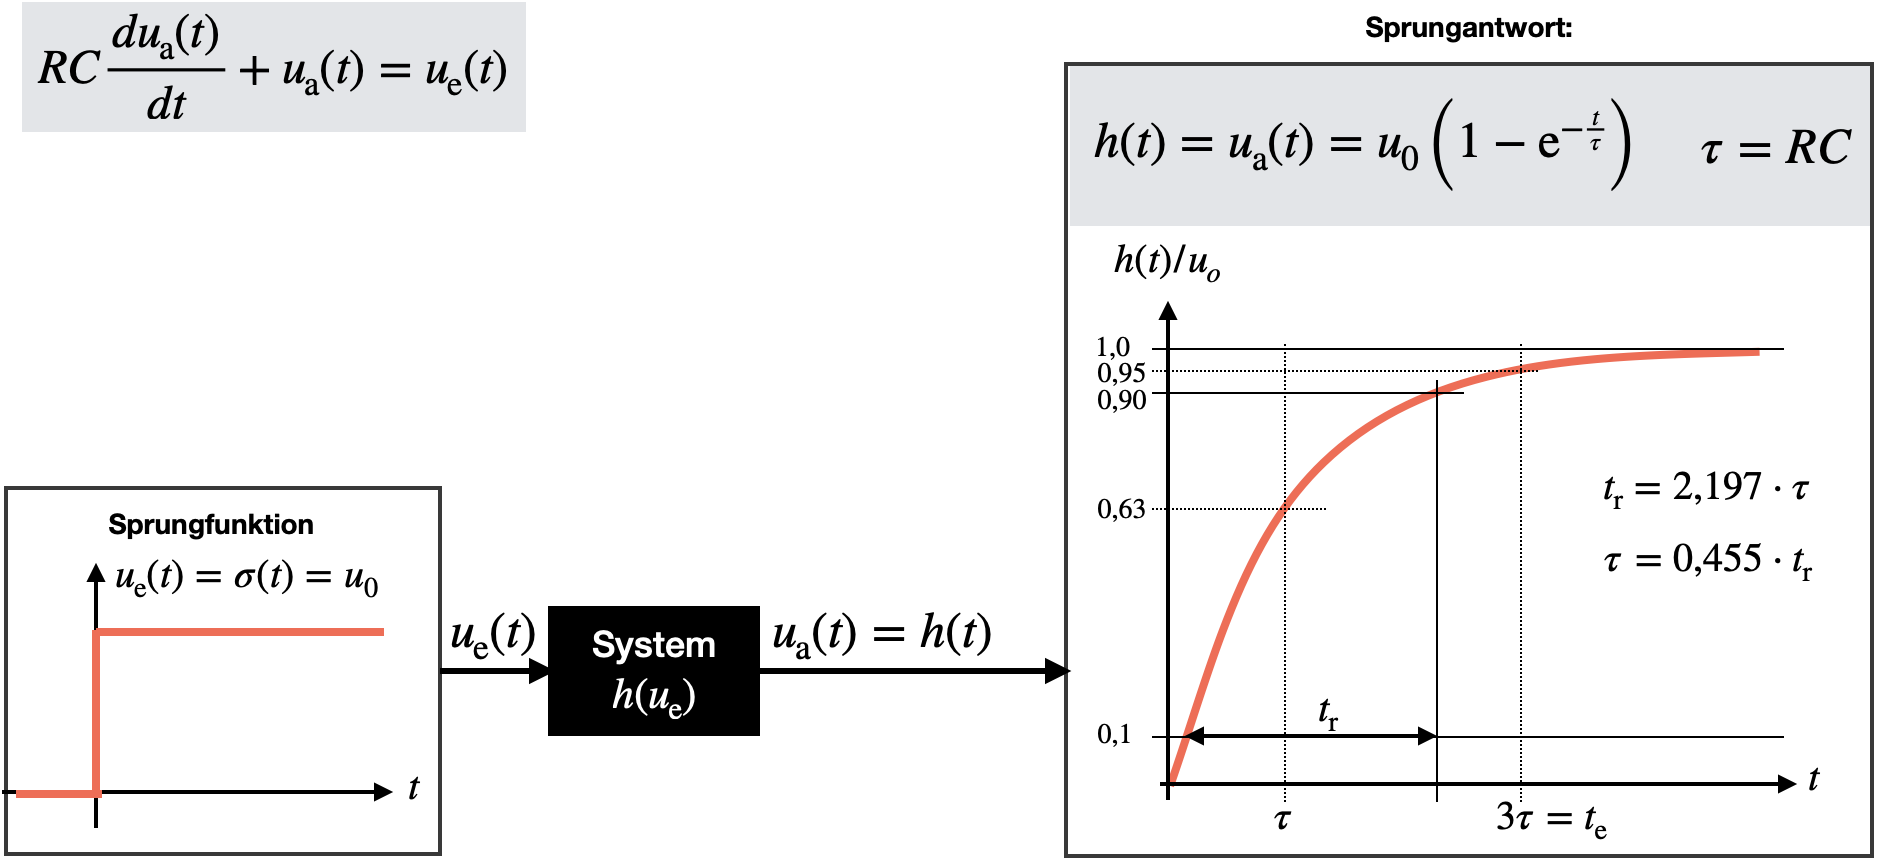

In [15]:
Image("pictures/sprungantwort.png", width=600)

#### Impulsantwort und Faltung
<a id="SubSubSec-Impulsantwort_und_Faltung"></a>

In diesem Abschnitt wollen wir uns der Genialität der Impulsantwort in Kombination mit der Faltung widmen. 
Hierfür müssen wir uns zuerst angucken, was *Faltung* überhaupt bedeutet. 